/Users/baigeiguai/anaconda3/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


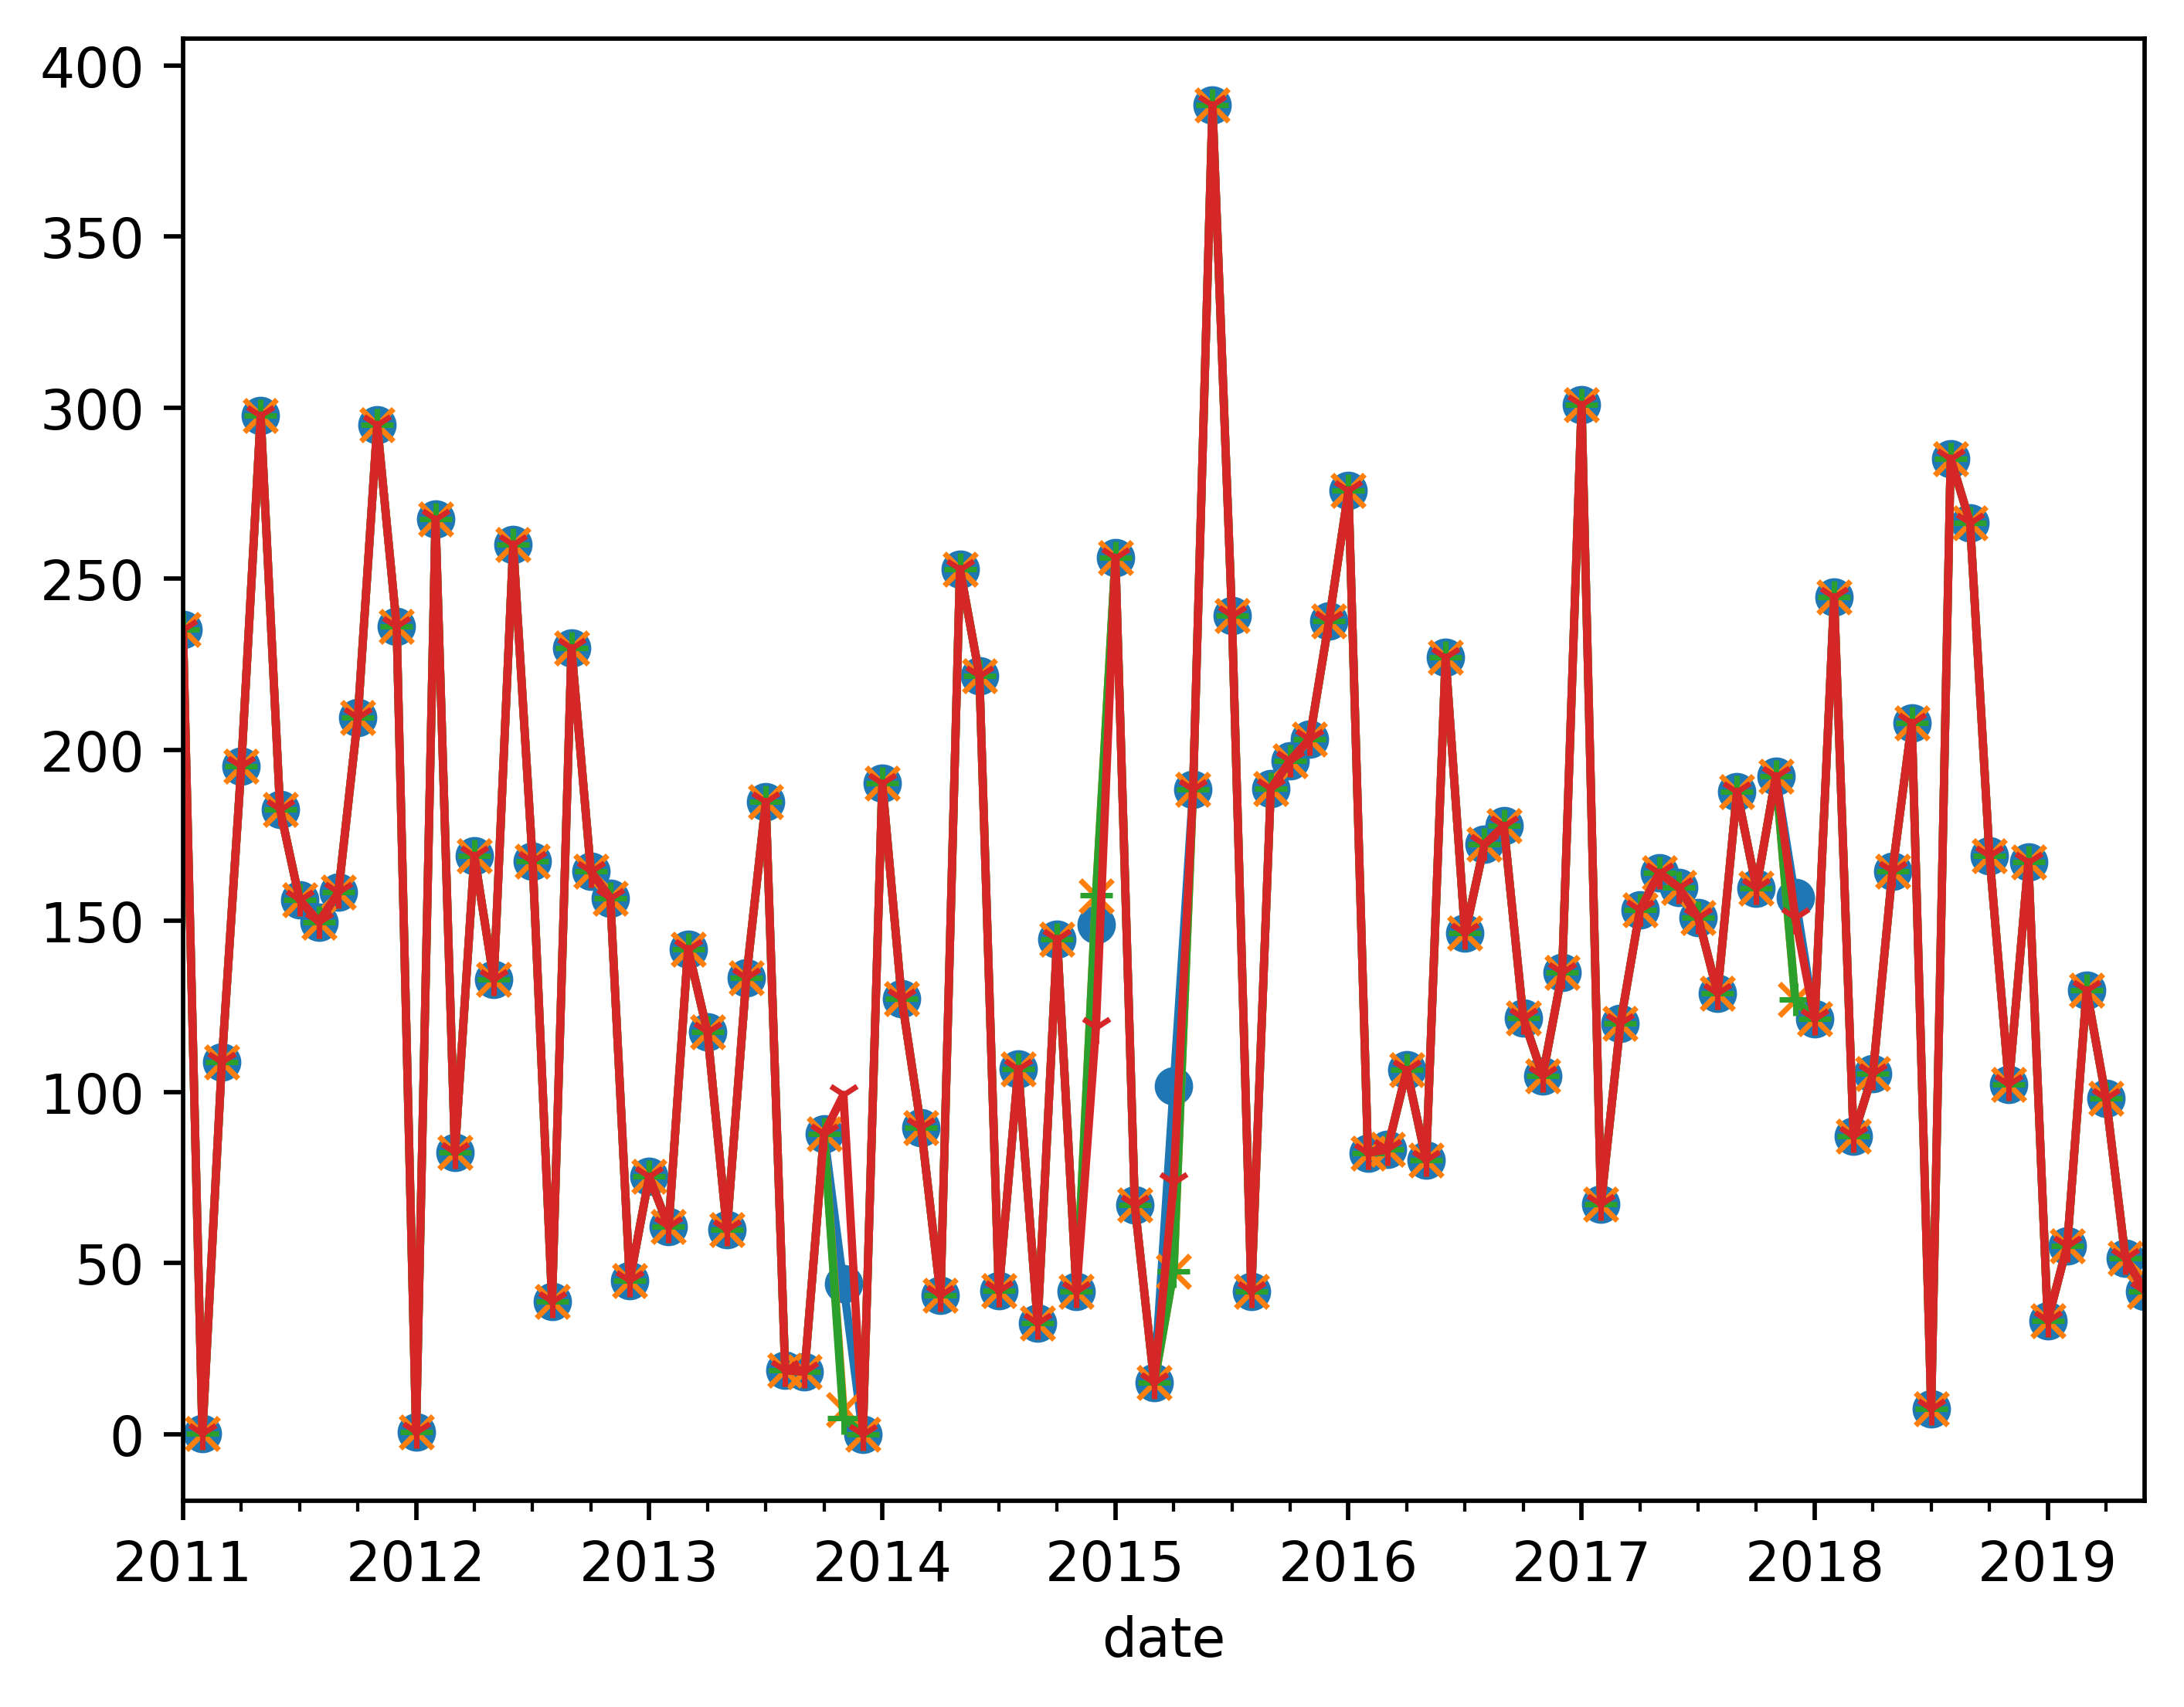

In [1]:
### 查看各插值方法对数据的影响


import numpy as np 
import pandas as pd
import warnings
from matplotlib import pyplot as plt 
warnings.filterwarnings("ignore")
plt.figure(dpi=512)
def my_plot(index,data,marker='o'):
    data.index  = index
    data.plot(marker=marker)

file_path = './source_data/A2.xlsx'
data = pd.read_excel(file_path)
data.columns = ['date1','id1','id2','sales','values']
data['date']=pd.to_datetime(data['date1'],format="%Y%m")
data = data[data['id1']>=0]

data_linear = data['sales'].interpolate()
my_plot(data['date'],data_linear)
poly_data = data['sales'].interpolate(method='polynomial',order=3)
my_plot(data['date'],poly_data,'x')

spline_data = data['sales'].interpolate(method='spline',order=3)

my_plot(data['date'],spline_data,'+')

human_data = pd.read_excel('./source_data/A2backup.xlsx')
human_data.columns= ['date1','id1','id2','sales','values']
human_data = human_data[human_data['id1']>=0]

my_plot(data['date'],human_data['sales'],'1')



<AxesSubplot:xlabel='date'>

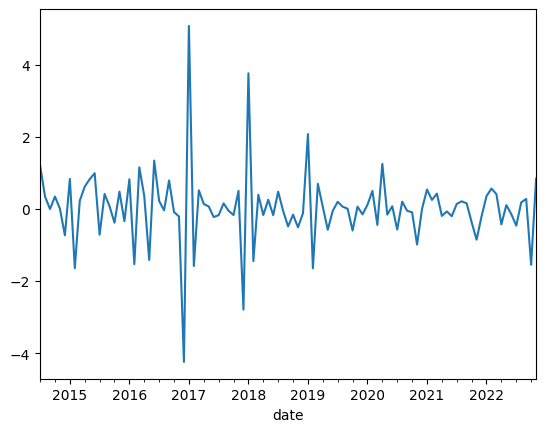

In [101]:
## train auto_arima


import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from statsmodels.tsa.statespace.sarimax import SARIMAX
from itertools import product
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima



file_path = './source_data/A3.xlsx'
raw_data = pd.read_excel(file_path)
raw_data.columns = ['date1','id1','id2','sales','values']
raw_data['date']=pd.to_datetime(raw_data['date1'],format="%Y%m")
raw_data = raw_data[raw_data['id1']>=0]
data = raw_data[['date','sales']]
data['sales'] = data['sales'].apply(np.log1p)
data.set_index('date', inplace=True)
data = data.interpolate(method='polynomial',order=3)



def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)

diff_data = difference(data['sales'].values,1)
diff_data = pd.DataFrame(diff_data)
diff_data.index = data.index[1:]

diff_data[0].plot()

# def scale(train,test):
#     # 创建一个缩放器，将数据集中的数据缩放到[-1,1]的取值范围中
#     scaler=MinMaxScaler(feature_range=(-1,1))
#     # 使用数据来训练缩放器
#     scaler=scaler.fit(train)
#     # 使用缩放器来将训练集和测试集进行缩放
#     train_scaled=scaler.transform(train)
#     test_scaled=scaler.transform(test)
#     return scaler,train_scaled,test_scaled

# train_num = 90
# # scaler, train_data,test_data = scale(diff_data[:train_num],diff_data[train_num:])
# train_data,test_data = diff_data[:train_num],diff_data[train_num:]

# train_data = pd.DataFrame(train_data)
# train_data.index = data.index[:train_num]
# train_data.columns =['y']
# test_data = pd.DataFrame(test_data)
# test_data.index = data.index[train_num:-1]
# test_data.columns =['y']




# model = auto_arima(train_data[62:], seasonal=False, m=1)
# test_predict = model.predict(test_data.shape[0])


# test_predict.index = test_data.index
# # test_predict = scaler.inverse_transform(test_predict).reshape(-1)

# # test_data = scaler.inverse_transform(test_data).reshape(-1)
# # train_data = scaler.inverse_transform(train_data)
# # test_predict.plot(marker='x')



# def inverse_difference(start,data):
#     l =  [start]
#     s = start
#     for i in data:
#         s+=i
#         l.append(s)        
#     return pd.DataFrame(l)

# inverse_predict =  inverse_difference(train_data.y.sum()+data['sales'][0],test_predict.values)

# inverse_predict = inverse_predict.apply(np.expm1)
# # # # inverse_predict



# inverse_test = inverse_difference(train_data.y.sum()+data['sales'][0],test_data.y)
# inverse_test = inverse_test.apply(np.expm1)



# print(r2_score(inverse_test[0],inverse_predict[0]))
# print(mean_squared_error(inverse_test[0],inverse_predict[0]))
# print(mean_absolute_error(inverse_test[0],inverse_predict[0]))

# inverse_predict[0].plot(marker='x')
# inverse_test[0].plot(marker='o')


15:52:39 - cmdstanpy - INFO - Chain [1] start processing
15:52:39 - cmdstanpy - INFO - Chain [1] done processing


-17.933684522661622
140829.7940201691
226.2869400861781


<AxesSubplot:>

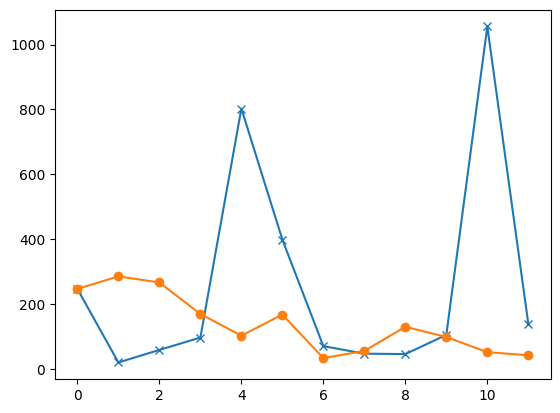

In [98]:
## train Prophet 


import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from prophet import Prophet
from itertools import product
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima



file_path = './source_data/A2backup.xlsx'
raw_data = pd.read_excel(file_path)
raw_data.columns = ['date1','id1','id2','sales','values']
raw_data['date']=pd.to_datetime(raw_data['date1'],format="%Y%m")
raw_data = raw_data[raw_data['id1']>=0]
data = raw_data[['date','sales']]
data['sales'] = data['sales'].apply(np.log1p)
data.set_index('date', inplace=True)
data = data.interpolate(method='polynomial',order=3)



def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)

diff_data = difference(data['sales'].values,1)
diff_data = pd.DataFrame(diff_data)
diff_data.index = data.index[1:]

# diff_data[0].plot()

def scale(train,test):
    # 创建一个缩放器，将数据集中的数据缩放到[-1,1]的取值范围中
    scaler=MinMaxScaler(feature_range=(-1,1))
    # 使用数据来训练缩放器
    scaler=scaler.fit(train)
    # 使用缩放器来将训练集和测试集进行缩放
    train_scaled=scaler.transform(train)
    test_scaled=scaler.transform(test)
    return scaler,train_scaled,test_scaled

train_num = 90
# scaler, train_data,test_data = scale(diff_data[:train_num],diff_data[train_num:])
train_data,test_data = diff_data[:train_num],diff_data[train_num:]

train_data = pd.DataFrame(train_data)
train_data.index = data.index[:train_num]
train_data.columns =['y']
test_data = pd.DataFrame(test_data)
test_data.index = data.index[train_num:-1]
test_data.columns =['y']

train_data['ds'] = train_data.index
train_data = train_data[['ds','y']]

model = Prophet(holidays_mode='multiplicative',changepoint_range=0.2)
model.fit(train_data[60:])
future_times = model.make_future_dataframe(test_data.shape[0],freq='M',include_history=False)

test_predict = model.predict(future_times).yhat

# test_predict.index = test_data.index
# # test_predict = scaler.inverse_transform(test_predict).reshape(-1)
# # test_data = scaler.inverse_transform(test_data).reshape(-1)
# # train_data = scaler.inverse_transform(train_data)
# # test_predict.plot(marker='x')



def inverse_difference(start,data):
    l =  [start]
    s = start
    for i in data:
        s+=i
        l.append(s)        
    return pd.DataFrame(l)

inverse_predict =  inverse_difference(train_data.y.sum()+data['sales'][0],test_predict.values)
inverse_predict = inverse_predict.apply(np.expm1)
# # # # inverse_predict



inverse_test = inverse_difference(train_data.y.sum()+data['sales'][0],test_data.y)
inverse_test = inverse_test.apply(np.expm1)



print(r2_score(inverse_test[0],inverse_predict[0]))
print(mean_squared_error(inverse_test[0],inverse_predict[0]))
print(mean_absolute_error(inverse_test[0],inverse_predict[0]))

inverse_predict[0].plot(marker='x')
inverse_test[0].plot(marker='o')


[0]	validation_0-rmse:0.49158	validation_1-rmse:0.58174
[1]	validation_0-rmse:0.46161	validation_1-rmse:0.58623
[2]	validation_0-rmse:0.43369	validation_1-rmse:0.58835
[3]	validation_0-rmse:0.40771	validation_1-rmse:0.59159
[4]	validation_0-rmse:0.38352	validation_1-rmse:0.59562
[5]	validation_0-rmse:0.36102	validation_1-rmse:0.60027
[6]	validation_0-rmse:0.34009	validation_1-rmse:0.60501
[7]	validation_0-rmse:0.32054	validation_1-rmse:0.61043
[8]	validation_0-rmse:0.30128	validation_1-rmse:0.60986
[9]	validation_0-rmse:0.28431	validation_1-rmse:0.61575
[10]	validation_0-rmse:0.26830	validation_1-rmse:0.61939
[11]	validation_0-rmse:0.25274	validation_1-rmse:0.62111
[12]	validation_0-rmse:0.23831	validation_1-rmse:0.62310
[13]	validation_0-rmse:0.22495	validation_1-rmse:0.62386
[14]	validation_0-rmse:0.21254	validation_1-rmse:0.62621
[15]	validation_0-rmse:0.20106	validation_1-rmse:0.62864
[16]	validation_0-rmse:0.19096	validation_1-rmse:0.63110
[17]	validation_0-rmse:0.18151	validation

<AxesSubplot:>

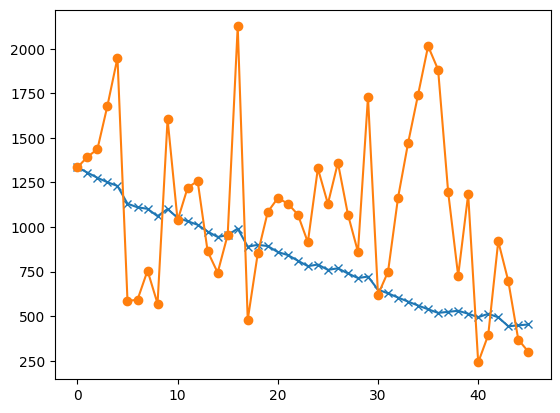

In [168]:
# use xgboost


import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from prophet import Prophet
from itertools import product
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
import xgboost as xgb

file_path = './source_data/A2backup.xlsx'
raw_data = pd.read_excel(file_path)
raw_data.columns = ['date1','id1','id2','sales','values']
raw_data['date']=pd.to_datetime(raw_data['date1'],format="%Y%m")
raw_data = raw_data[raw_data['id1']>=0]
data = raw_data[['date','sales']]
data['sales'] = data['sales'].apply(np.log1p)
data.set_index('date', inplace=True)
data = data.interpolate(method='polynomial',order=3)



def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)

diff_data = difference(data['sales'].values,1)
diff_data = pd.DataFrame(diff_data)
diff_data.index = data.index[1:]


def train_xgboost(data,in_windows,out_windows,train_num):
    X = []
    y = []
    L = len(data)
    for i in range(L):
        if i+in_windows+out_windows > L:
            break
        X.append(data[i:i+in_windows])
        y.append(data[i+in_windows:i+in_windows+out_windows])
    X = np.array(X)
    y = np.array(y)
    X_train,y_train,X_test,y_test= X[:train_num],y[:train_num],X[train_num:],y[train_num:]
    model = xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,early_stopping_rounds=50)
    model.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test,y_test)])
    test_pred = model.predict(X_test).reshape(-1,out_windows)
    print(test_pred)
    print("xgb r2:",r2_score(y_test,test_pred))
    print("xgb mse:",mean_squared_error(y_test,test_pred))
    print("xgb mae:",mean_absolute_error(y_test,test_pred))
    train_pred = model.predict(X_train).reshape(-1,out_windows)
    res = []
    for i in train_pred :
        res.append(i[0])
    for i in test_pred :
        res.append(i[0])
    return res

def inverse_difference(start,data):
    l =  [start]
    s = start
    for i in data:
        s+=i
        l.append(s)        
    return pd.DataFrame(l)


in_window_size,out_window_size = 12,1
input_data = diff_data[44:]
data_predict = train_xgboost(input_data[0],in_window_size,out_window_size,train_num=30)

data_true = input_data[in_window_size+out_window_size-1:]


inverse_predict =  inverse_difference(input_data[:in_window_size].sum().values[0]+data['sales'][0],data_predict)
inverse_predict = inverse_predict.apply(np.expm1)

inverse_true  = inverse_difference(input_data[:in_window_size].sum().values[0]+data['sales'][0],data_true[0])
inverse_true = inverse_true.apply(np.expm1)

print("raw r2:",r2_score(inverse_true[0],inverse_predict[0]))
print("raw mse:",mean_squared_error(inverse_true[0],inverse_predict[0]))
print("raw mase:",mean_absolute_error(inverse_true[0],inverse_predict[0]))

inverse_predict[0].plot(marker='x')
inverse_true[0].plot(marker='o')



epoch_0:tensor(0.3981, grad_fn=<MseLossBackward0>)
epoch_1:tensor(0.3636, grad_fn=<MseLossBackward0>)
epoch_2:tensor(0.3668, grad_fn=<MseLossBackward0>)
epoch_3:tensor(0.3609, grad_fn=<MseLossBackward0>)
epoch_4:tensor(0.3615, grad_fn=<MseLossBackward0>)
epoch_5:tensor(0.3562, grad_fn=<MseLossBackward0>)
epoch_6:tensor(0.3527, grad_fn=<MseLossBackward0>)
epoch_7:tensor(0.3485, grad_fn=<MseLossBackward0>)
epoch_8:tensor(0.3387, grad_fn=<MseLossBackward0>)
epoch_9:tensor(0.3289, grad_fn=<MseLossBackward0>)
epoch_10:tensor(0.3116, grad_fn=<MseLossBackward0>)
epoch_11:tensor(0.2908, grad_fn=<MseLossBackward0>)
epoch_12:tensor(0.2590, grad_fn=<MseLossBackward0>)
epoch_13:tensor(0.2348, grad_fn=<MseLossBackward0>)
epoch_14:tensor(0.4280, grad_fn=<MseLossBackward0>)
epoch_15:tensor(0.2736, grad_fn=<MseLossBackward0>)
epoch_16:tensor(0.3438, grad_fn=<MseLossBackward0>)
epoch_17:tensor(0.2816, grad_fn=<MseLossBackward0>)
epoch_18:tensor(0.2465, grad_fn=<MseLossBackward0>)
epoch_19:tensor(0.2426

<AxesSubplot:>

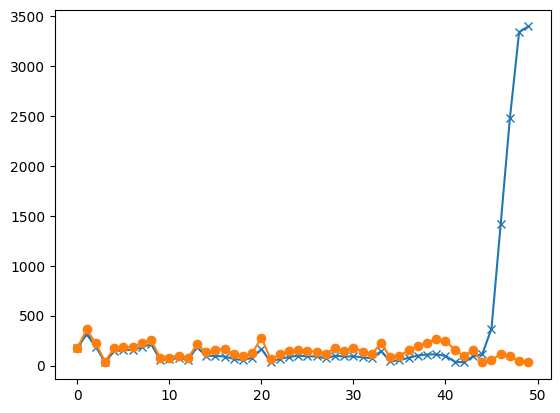

In [296]:
# use lstm


import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
from prophet import Prophet
from itertools import product
from tqdm import tqdm_notebook
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
from pmdarima import auto_arima
from sklearn.model_selection import train_test_split
import xgboost as xgb
import torch

file_path = './source_data/A2backup.xlsx'
raw_data = pd.read_excel(file_path)
raw_data.columns = ['date1','id1','id2','sales','values']
raw_data['date']=pd.to_datetime(raw_data['date1'],format="%Y%m")
raw_data = raw_data[raw_data['id1']>=0]
data = raw_data[['date','sales']]
data['sales'] = data['sales'].apply(np.log1p)
data.set_index('date', inplace=True)
data = data.interpolate(method='polynomial',order=3)



def difference(data_set,interval=1):
    diff=list()
    for i in range(interval,len(data_set)):
        value=data_set[i]-data_set[i-interval]
        diff.append(value)
    return pd.Series(diff)

diff_data = difference(data['sales'].values,1)
diff_data = pd.DataFrame(diff_data)
diff_data.index = data.index[1:]


class lstm(torch.nn.Module):
    def __init__(self,in_windows,out_windows, hidden_size, hidden_num_layers):
        super(lstm, self).__init__()
        # 定义LSTM
        self.lstm = torch.nn.LSTM(1, hidden_size, hidden_num_layers)
        # 定义回归层网络，输入的特征维度等于LSTM的输出，输出维度为1
        self.reg = torch.nn.Sequential(
            torch.nn.Linear(hidden_size, 25),
            torch.nn.Tanh(),
            torch.nn.Linear(25, out_windows),
        )

    def forward(self,x):
        x = x.transpose(-1,-2)
        x = x.view(x.shape[0],x.shape[1],1)
        x,(h,c)= self.lstm(x)
        return self.reg(h[-1])
    

def train_lstm(data,in_windows,out_windows,train_num,epoch_num):
    X = [] 
    y = [] 
    L = len(data)
    for i in range(L):
        if i+in_windows+out_windows > L:
            break
        X.append(data[i:i+in_windows])
        y.append(data[i+in_windows:i+in_windows+out_windows])
    X = np.array(X)
    y = np.array(y)
    # print("XXX",X.shape)
    # print("yyy",y.shape)
    X_train,y_train,X_test,y_test= torch.tensor(X[:train_num]).type(torch.float32),torch.tensor(y[:train_num]).type(torch.float32),torch.tensor(X[train_num:]).type(torch.float32),torch.tensor(y[train_num:],requires_grad=False).type(torch.float32)
    model = lstm(in_windows=in_windows,out_windows=out_windows,hidden_size=50,hidden_num_layers=2)
    optimizer = torch.optim.AdamW(model.parameters(),lr=0.01)
    lossfn = torch.nn.MSELoss()
    for epoch_idx in range(epoch_num):
        optimizer.zero_grad()
        out = model(X_train)
        error = lossfn(out,y_train)
        print("epoch_%d:%s"%(epoch_idx,error))
        error.backward()
        optimizer.step()
        
    with torch.no_grad():
        model.eval()
        test_pred = model(X_test)
        print("lstm r2:",r2_score(y_test,test_pred))
        print("lstm mse:",mean_squared_error(y_test,test_pred))
        print("lstm mae:",mean_absolute_error(y_test,test_pred))
        train_pred = model(X_train)
        res = []
        for i in train_pred.numpy() :
            res.append(i[0])
        for i in test_pred.numpy():
            res.append(i[0])
        return res


def inverse_difference(start,data):
    l =  [start]
    s = start
    for i in data:
        s+=i
        l.append(s)        
    return pd.DataFrame(l)


in_window_size,out_window_size = 12,1
input_data = diff_data[40:]
input_data.columns = ['y']
data_predict = train_lstm(input_data.y.values,in_window_size,out_window_size,train_num=40,epoch_num=100)
data_true = input_data[in_window_size:]
if out_window_size!= 1 :
    data_true = data_true[:-out_window_size+1]

# data_true.y.plot()
# data_predict = pd.DataFrame(data_predict)
# data_predict.index = data_true.index
# data_predict[0].plot()
# print(data_predict.shape)


inverse_predict =  inverse_difference(input_data[:in_window_size].sum().values[0]+data['sales'][0],data_predict)
inverse_predict = inverse_predict.apply(np.expm1)

inverse_true  = inverse_difference(input_data[:in_window_size].sum().values[0]+data['sales'][0],data_true.y)
inverse_true = inverse_true.apply(np.expm1)

print("raw r2:",r2_score(inverse_true[0],inverse_predict[0]))
print("raw mse:",mean_squared_error(inverse_true[0],inverse_predict[0]))
print("raw mase:",mean_absolute_error(inverse_true[0],inverse_predict[0]))

inverse_predict[0].plot(marker='x')
inverse_true[0].plot(marker='o')



             0
0   175.309781
1   361.390974
2   222.629474
3    38.673795
4   175.454956
5   183.179025
6   188.989758
7   221.177721
8   256.641434
9    76.452867
10   77.353699
11   98.955034
12   74.431581
13  211.171795
14  136.131071
15  160.326949
16  165.396916
17  113.148709
18   97.410220
19  125.436492
20  279.888089
21   62.538376
22  111.637397
23  142.455501
24  152.651272
25  148.653368
26  140.490051
27  119.942167
28  174.695578
29  148.437466
30  178.920551
31  140.504941
32  112.850913
33  227.628715
34   81.076141
35   98.035591
36  152.975124
37  193.393408
38  229.354067
39  265.314726
40  247.841579
41  157.315493
42   95.154420
43  155.573389
44   30.849221
45   51.207260
46  120.701545
47   91.324026
48   47.797503
49   38.856195
[[ 175.30978106]
 [ 313.73903613]
 [ 189.04263779]
 [  33.68902937]
 [ 144.90418463]
 [ 153.03640378]
 [ 158.05092124]
 [ 181.18631425]
 [ 215.53490871]
 [  58.7237696 ]
 [  61.37565117]
 [  74.93106703]
 [  58.21513413]
 [ 181.1374139

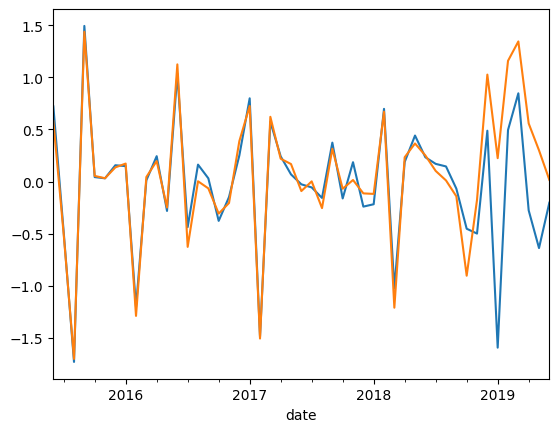

In [297]:
data_true.y.plot()
ndata_predict = pd.DataFrame(data_predict)
ndata_predict.index = data_true.index
ndata_predict[0].plot()

print(inverse_true)
print(inverse_predict.values)

In [291]:
print(inverse_true.shape)


(1, 1)
